# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Check weather api key was imported correctly
weather_api_key

'9da89ea3e04bcb9a1de66c77694a15e0'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
print('Beginning Data Retrieval')
print('-----------------------------')

# Counters for sets and records
set_num = 1
record_num = 1

# List to hold city data
data = []

url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Loop counter
x = 0

# Loop through all the cities in the list
for x in range(0, len(cities)):
    
    # Build index value
    index = (record_num - 1) + 50 * (set_num - 1)
    
    # Build query_url
    query_url = url + cities[index] + "&appid=" + weather_api_key + "&units=imperial"
    
    # Display processing message
    print('Processing Record ' + str(record_num) + ' of Set ' + str(set_num) + ' | ' + str(cities[index]))
    
    # Increment record_num
    record_num = record_num + 1
    
    # Reset record_num when it reaches 50 and increment set_num
    if (record_num == 50):
        record_num = 1
        set_num = set_num + 1
        
    # Obtain cloudiness, country, date, humidity, latitude, longitude, max temperature, and wind speed for each city
    # If there is an error, display "City not found"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']    
        date = weather_json['dt']
        humidity = weather_json['main']['humidity']    
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        max_temperature = weather_json['main']['temp_max']
        wind_speed = weather_json['wind']['speed']
    
        # Append them to the data list
        data.append({'City': cities[index],
                     'Cloudiness': cloudiness,
                     'Country': country,
                     'Date': date,
                     'Humidity': humidity,                 
                     'Lat': latitude,
                     'Lng': longitude,
                     'Max Temp': max_temperature,
                     'Wind Speed': wind_speed
                    })
    except:
        print('City not found. Skipping...')

# After the loop is over, print ending message
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | stornoway
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mao
Processing Record 7 of Set 1 | talara
Processing Record 8 of Set 1 | camacha
Processing Record 9 of Set 1 | chippewa falls
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | ulladulla
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | peniche
Processing Record 20 of Set 1 | mabaruma
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | mogok
Processing Record 

Processing Record 42 of Set 4 | bestobe
Processing Record 43 of Set 4 | urengoy
Processing Record 44 of Set 4 | chernyshevskiy
Processing Record 45 of Set 4 | umm lajj
Processing Record 46 of Set 4 | comodoro rivadavia
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | omboue
Processing Record 49 of Set 4 | port hedland
Processing Record 1 of Set 5 | birobidzhan
Processing Record 2 of Set 5 | merritt island
Processing Record 3 of Set 5 | mwene-ditu
Processing Record 4 of Set 5 | soe
Processing Record 5 of Set 5 | san angelo
Processing Record 6 of Set 5 | moroni
Processing Record 7 of Set 5 | port macquarie
Processing Record 8 of Set 5 | koslan
Processing Record 9 of Set 5 | les cayes
Processing Record 10 of Set 5 | cabo san lucas
Processing Record 11 of Set 5 | dikson
Processing Record 12 of Set 5 | ulcinj
Processing Record 13 of Set 5 | ntchisi
Processing Record 14 of Set 5 | mineiros
Processing Record 15 of Set 5 | basudebpur
Processing Record 16 of Set 5 | sh

Processing Record 34 of Set 8 | warqla
City not found. Skipping...
Processing Record 35 of Set 8 | tasiilaq
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | inirida
Processing Record 38 of Set 8 | ladyzhyn
Processing Record 39 of Set 8 | derzhavinsk
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | angoche
Processing Record 43 of Set 8 | omsukchan
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | alberton
Processing Record 48 of Set 8 | abha
Processing Record 49 of Set 8 | anadyr
Processing Record 1 of Set 9 | yanchukan
City not found. Skipping...
Processing Record 2 of Set 9 | ada
Processing Record 3 of Set 9 | sekoma
Processing Record 4 of Set 9 | kholm-zhirkovskiy
Processing Record 5 of Set 9 | college
Processing Record 6 of Set 9 | quzhou
Processing Record 7 of Set 9 | leh
Processing Record 8 of

Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | tapes
Processing Record 28 of Set 12 | khasan
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | fuerte olimpo
Processing Record 31 of Set 12 | gornoye loo
Processing Record 32 of Set 12 | deer lake
Processing Record 33 of Set 12 | ponta delgada
Processing Record 34 of Set 12 | grimshaw
Processing Record 35 of Set 12 | luanda
Processing Record 36 of Set 12 | ayr
Processing Record 37 of Set 12 | abu kamal
Processing Record 38 of Set 12 | entroncamento
Processing Record 39 of Set 12 | dehloran
Processing Record 40 of Set 12 | visakhapatnam
Processing Record 41 of Set 12 | pochutla
Processing Record 42 of Set 12 | kyra
Processing Record 43 of Set 12 | tommot
Processing Record 44 of Set 12 | marand
Processing Record 45 of Set 12 | kalaikunda
Processing Record 46 of Set 12 | byron bay
Processing Record 47 of Set 12 | maulvi bazar
City not found. Skipping...
Processing Record 48 of Set 12 | camp

IndexError: list index out of range

In [17]:
# Debug stuff

# Check a couple records from data to see that it looks right

x = 0

for x in range(0, 10):
    print(data[x])

{'City': 'ribeira grande', 'Cloudiness': 21, 'Country': 'PT', 'Date': 1597885901, 'Humidity': 68, 'Lat': 38.52, 'Lng': -28.7, 'Max Temp': 68.9, 'Wind Speed': 15.59}
{'City': 'mataura', 'Cloudiness': 93, 'Country': 'NZ', 'Date': 1597885901, 'Humidity': 77, 'Lat': -46.19, 'Lng': 168.86, 'Max Temp': 55.99, 'Wind Speed': 1.99}
{'City': 'chokurdakh', 'Cloudiness': 100, 'Country': 'RU', 'Date': 1597885790, 'Humidity': 93, 'Lat': 70.63, 'Lng': 147.92, 'Max Temp': 36.72, 'Wind Speed': 9.73}
{'City': 'stornoway', 'Cloudiness': 100, 'Country': 'GB', 'Date': 1597885797, 'Humidity': 87, 'Lat': 58.21, 'Lng': -6.39, 'Max Temp': 59, 'Wind Speed': 14.99}
{'City': 'vaini', 'Cloudiness': 90, 'Country': 'TO', 'Date': 1597885903, 'Humidity': 83, 'Lat': -21.2, 'Lng': -175.2, 'Max Temp': 77, 'Wind Speed': 10.29}
{'City': 'mao', 'Cloudiness': 0, 'Country': 'ES', 'Date': 1597885904, 'Humidity': 88, 'Lat': 39.89, 'Lng': 4.27, 'Max Temp': 75.2, 'Wind Speed': 4.7}
{'City': 'talara', 'Cloudiness': 79, 'Country': 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
df = pd.DataFrame(data)

df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [19]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,21,PT,1597885901,68,38.52,-28.70,68.90,15.59
1,mataura,93,NZ,1597885901,77,-46.19,168.86,55.99,1.99
2,chokurdakh,100,RU,1597885790,93,70.63,147.92,36.72,9.73
3,stornoway,100,GB,1597885797,87,58.21,-6.39,59.00,14.99
4,vaini,90,TO,1597885903,83,-21.20,-175.20,77.00,10.29


In [29]:
# Save CSV of all retrieved data
df.to_csv (r'city_data.csv', index = False, header = True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

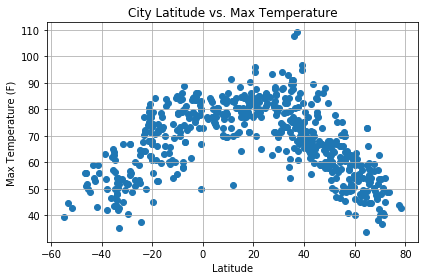

In [30]:
x_values = df['Lat']
y_values = df['Max Temp']

plt.scatter(x_values, y_values, marker = 'o')

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.tight_layout()

plt.savefig('plot_1_latitude_vs_max_temperature.png')

plt.show()

This plot shows that there is a kind of rainbow shape when latitude is compared to max temperature. This makes sense as values in the middle are closer to the equator where it is generally warmer. Alternatively, the further away from the equator, the lower the max temperature.

#### Latitude vs. Humidity Plot

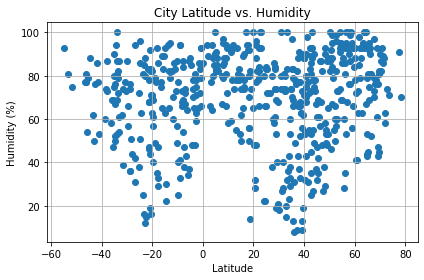

In [31]:
x_values = df['Lat']
y_values = df['Humidity']

plt.scatter(x_values, y_values, marker = 'o')

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.tight_layout()

plt.savefig('plot_2_latitude_vs_humidity.png')

plt.show()

This plot shows that latitudes close to the equator (around 0) genearlly all have high humidity. While there are also cities with high humidities at other latitudes, there is a lot more variance in humidity levels. It appears that cities at more extreme latitudes also tend to have high humidity.

#### Latitude vs. Cloudiness Plot

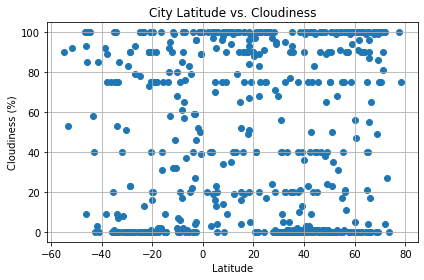

In [32]:
x_values = df['Lat']
y_values = df['Cloudiness']

plt.scatter(x_values, y_values, marker = 'o')

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.tight_layout()

plt.savefig('plot_3_latitude_vs_cloudiness.png')

plt.show() 

There does not appear to be any discernible pattern for this plot. In other words, latitude and cloudiness do not appear to correlate.

#### Latitude vs. Wind Speed Plot

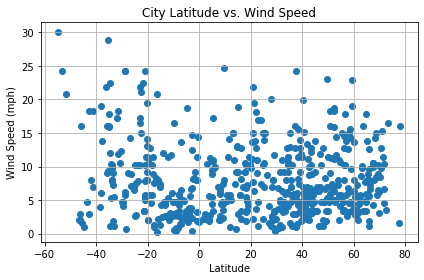

In [33]:
x_values = df['Lat']
y_values = df['Wind Speed']

plt.scatter(x_values, y_values, marker = 'o')

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.tight_layout()

plt.savefig('plot_4_latitude_vs_wind_speed.png')

plt.show() 

This plot looks sort of like a straight line, as most points are near the 'bottom' of it. It shows that wind speed is usually low at most latitudes.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df.loc[df['Lat'] >= 0]
southern_df = df.loc[df['Lat'] < 0]

In [36]:
# Check summary of each new df
northern_df.head()
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,21,PT,1597885901,68,38.52,-28.70,68.90,15.59
2,chokurdakh,100,RU,1597885790,93,70.63,147.92,36.72,9.73
3,stornoway,100,GB,1597885797,87,58.21,-6.39,59.00,14.99
5,mao,0,ES,1597885904,88,39.89,4.27,75.20,4.70
7,camacha,40,PT,1597885905,83,33.08,-16.33,73.40,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5309397250561958


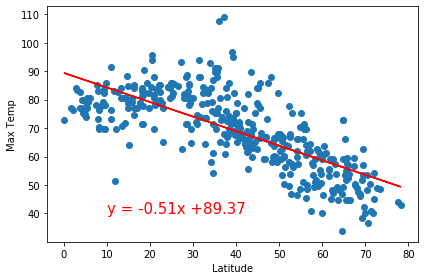

In [43]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (10, 40), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_5_northern_latitude_vs_max_temp.png')

plt.show()

This plot shows a downward trend in max temperature as latitude increases. In other words, cities further from the equator tend to have lower max temperatures. The r-squared value of 0.53 indicates that the model fits the data just over half the time, thus predicting max temperature from latitude is only slightly better than a coin flip.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.529052436369527


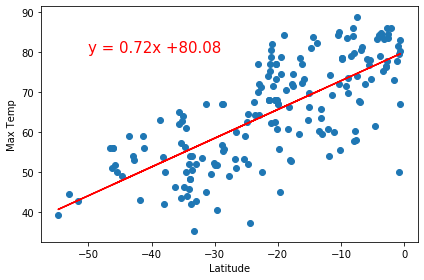

In [45]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-50, 80), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_6_southern_latitude_vs_max_temp.png')

plt.show()

This plot shows an increasing trend in max temperature as latitude approaches 0. The r-squared value of 0.529 indicates that the model fits the data by about 53%, so latitude is not a particularly strong predictor for max temperature. It's worth noting that r-squared was about the same for both northern and southern hemisphere data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 6.334386576306299e-05


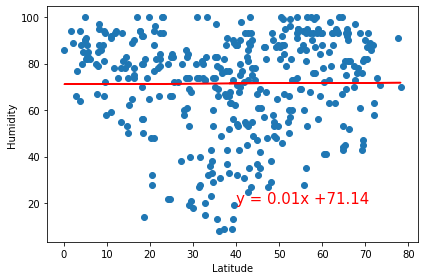

In [46]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (40, 20), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_7_northern_latitude_vs_humidity.png')

plt.show()

The linear regression model is nearly a straight line which indicates there is no positive nor negative correlation between latitude and humidity in the northern hemisphere. Furthermore, the r-squared value is incredibly small (less than 1%), so latitude basically cannot predict humidity at all.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001373804244346099


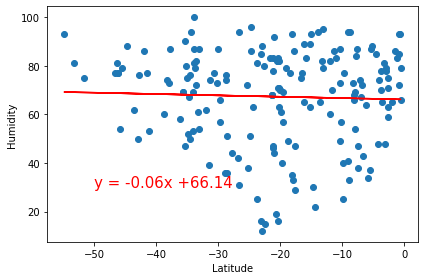

In [51]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (-50, 30), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_8_southern_latitude_vs_humidity.png')

plt.show()

The plot for the southern hemisphere is much like the northern hemisphere; the linear regression model is almost a straight line which indicates no positive nor negative correlation between latitude and humidity levels. Again, the r-squared value is very tiny, so the model is a poor predictor for humidity based on latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.3350343155603835e-07


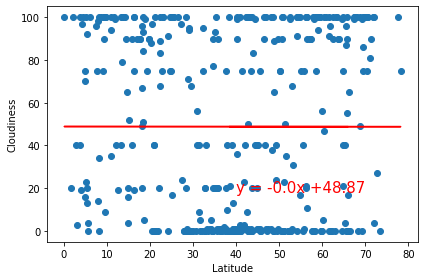

In [53]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (40, 18), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_9_northern_latitude_vs_cloudiness.png')

plt.show()

The linear regression model is a straight line which indicates no positive nor negative trend between latitude and cloudiness. The miniscule r-squared value indicates that latitude is a poor predictor for cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.5466866175064067e-05


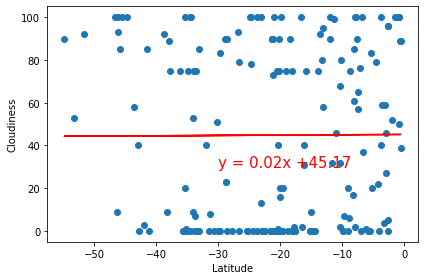

In [54]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (-30, 30), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_10_southern_latitude_vs_cloudiness.png')

plt.show()

Similar to the northern hemisphere plot, there appears to be no trend between latitude and cloudiness based on the linear regression model. The extremely small r-squared value indicates that latitude is a poor predictor of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0038580833821873473


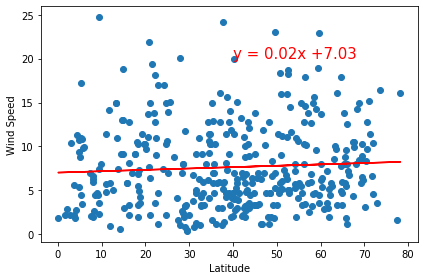

In [56]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (40, 20), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_11_northern_latitude_vs_wind_speed.png')

plt.show()

The linear regression model is almost a straight line. This indicates no trend between latitude and wind speed. The tiny r-squared value suggests that latitude is a poor predictor of wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1167428767974711


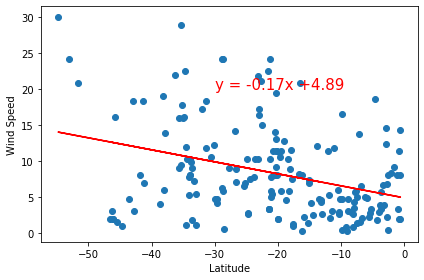

In [57]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# Linear regression stuff
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, marker = 'o')
plt.plot(x_values, regress_values, 'r-')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (-30, 20), fontsize = 15, color = 'red')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()

plt.savefig('plot_12_southern_latitude_vs_wind_speed.png')

plt.show()

For this plot the linear regression model shows a downward trend between latitude and wind speed. However, the small r-squared value indicates that the model is not a strong predictor, thus latitude is a poor predictor of wind speed in the southern hemisphere. However, it is slightly better when compared to the northern hemisphere.